# 🧠 Introduction to Deep Learning

## What is Deep Learning?

**Deep Learning (DL)** is a subfield of **Machine Learning (ML)** that focuses on using **artificial neural networks** with multiple layers (hence the word *deep*) to automatically learn complex patterns from data.

In traditional ML, we often need to manually extract features from raw data.  
In Deep Learning, the model **learns both features and decision boundaries automatically** through multiple layers of abstraction.

### Key Idea:
Deep learning models process data through a sequence of transformations, where each layer extracts higher-level features from the previous layer’s output.  
For example:
- The first layer may detect edges in an image,  
- The second may detect shapes,  
- The third may detect objects or faces.

---

## 🧩 Where is Deep Learning Used?

Deep learning powers many of the technologies we use today. Here are some common applications:

- 🖼️ **Computer Vision** – image classification, object detection, facial recognition  
- 🗣️ **Speech Recognition** – voice assistants, transcription systems  
- ✍️ **Natural Language Processing (NLP)** – chatbots, translation, sentiment analysis  
- 🚗 **Autonomous Vehicles** – self-driving cars, lane detection  
- 💊 **Healthcare** – medical image analysis, disease prediction  
- 📈 **Finance** – fraud detection, stock prediction  
- 🎮 **Reinforcement Learning** – gaming, robotics, control systems  

![types-of-data-img](img/image.png)


---

## 🤖 Deep Learning vs. Machine Learning

| Aspect | Machine Learning | Deep Learning |
|:--|:--|:--|
| **Definition** | Models that learn patterns from data to make predictions | A subset of ML using deep neural networks with many layers |
| **Feature Extraction** | Manual – features must be designed by experts | Automatic – features learned by the model |
| **Data Requirement** | Works well with smaller datasets | Requires large amounts of data |
| **Computation** | Less computationally intensive | Requires GPUs/TPUs for training |
| **Interpretability** | Easier to interpret (e.g., decision trees) | Often a “black box” – harder to interpret |
| **Examples** | Linear Regression, Random Forest, SVM | CNNs, RNNs, Transformers |

---

## 🧭 Summary

Deep Learning is **an evolution of Machine Learning**, enabling computers to learn complex representations directly from data using deep neural networks.  
While it requires more data and computation, it has achieved **state-of-the-art performance** across many domains such as vision, speech, and language.

> 💡 In short:  
> All Deep Learning is Machine Learning, but not all Machine Learning is Deep Learning.

![types-of-data-img](img/AI-vs-ML-vs-Deep-Learning.png)

# ⚙️ The Perceptron

## 🧠 What is a Perceptron?

The **Perceptron** is the **simplest type of artificial neural network**, introduced by **Frank Rosenblatt** in 1958.  
It is a **binary classifier** — meaning it decides whether an input belongs to one class or another.

You can think of it as a mathematical model that mimics how a single biological neuron works:
- It receives multiple inputs,
- Each input is assigned a *weight*,
- It sums them up,
- Then applies an **activation function** to determine the output.

---

## 🧩 Structure of a Perceptron

A perceptron takes several inputs $x_1, x_2, ..., x_n$ and produces one output $y$.

The computation process is as follows:

$$
z = w_1x_1 + w_2x_2 + ... + w_nx_n + b
$$

where:
- $w_i$ = weight of the $i^{th}$ input  
- $b$ = bias term (shifts the decision boundary)  
- $z$ = weighted sum of inputs  

Then the perceptron applies an **activation function**, often a *step function*:

$$
y =
\begin{cases}
1, & \text{if } z > 0 \\
0, & \text{otherwise}
\end{cases}
$$

---

## 🧮 Perceptron Learning Rule

The perceptron learns by updating its weights iteratively to minimize classification errors.

If the perceptron’s prediction is wrong:

$$
w_i := w_i + \Delta w_i
$$

where:

$$
\Delta w_i = \eta (y_{\text{true}} - y_{\text{pred}}) x_i
$$

and:

- $\eta$: learning rate (a small positive number)  
- $y_{\text{true}}$: actual label  
- $y_{\text{pred}}$: predicted output  

This process continues until the perceptron correctly classifies all training examples (if possible).

---

## 🔍 Example: OR Gate

| Input 1 | Input 2 | Output |
|:--:|:--:|:--:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

A perceptron can easily learn this function using suitable weights and bias, e.g.:

$$
y = \text{step}(x_1 + x_2 - 0.5)
$$

---

## ⚠️ Limitations

- A single-layer perceptron can only solve **linearly separable problems**.  
  - ✅ Works for: AND, OR  
  - ❌ Fails for: XOR  
- To solve complex or nonlinear problems, we use **multi-layer perceptrons (MLPs)**, which are the foundation of **Deep Learning**.

---

## 🧭 Summary

| Concept | Description |
|:--|:--|
| **Type** | Binary linear classifier |
| **Key Components** | Weights, Bias, Activation function |
| **Learning** | Adjusts weights using errors |
| **Limitation** | Works only for linearly separable data |
| **Extension** | Multi-Layer Perceptron (MLP) → Deep Neural Networks |

> 💡 In short:  
> The Perceptron is the **building block of neural networks**, showing how a model can *learn from data* by adjusting weights.


![types-of-data-img](img/1__xbbcmL06_nXADsGK1TAug.png)

In [ ]:
import numpy as np

# ----------------------------
# OR Gate Data
# ----------------------------
# Inputs (x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected outputs
y = np.array([0, 1, 1, 1])

# ----------------------------
# Initialize Parameters
# ----------------------------
np.random.seed(42)  # for reproducibility
weights = np.random.randn(2) * 0.1  # small random weights
bias = 0.0
learning_rate = 0.1

# ----------------------------
# Activation Function
# ----------------------------
def step_function(x):
    return 1 if x >= 0 else 0

# ----------------------------
# Training Loop
# ----------------------------
epochs = 10

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Weighted sum
        z = np.dot(X[i], weights) + bias
        # Prediction
        y_pred = step_function(z)
        # Error
        error = y[i] - y_pred
        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        total_error += abs(error)

    print(f"Epoch {epoch+1} | Total Error: {total_error}")

# ----------------------------
# Testing
# ----------------------------
print("\nFinal weights:", weights)
print("Final bias:", bias)
print("\nTesting OR gate:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    print(f"Input: {X[i]} → Output: {step_function(z)} (Expected: {y[i]})")


Epoch 1 | Total Error: 2
Epoch 2 | Total Error: 2
Epoch 3 | Total Error: 2
Epoch 4 | Total Error: 1
Epoch 5 | Total Error: 0
Epoch 6 | Total Error: 0
Epoch 7 | Total Error: 0
Epoch 8 | Total Error: 0
Epoch 9 | Total Error: 0
Epoch 10 | Total Error: 0

Final weights: [0.14967142 0.18617357]
Final bias: -0.1

Testing OR gate:
Input: [0 0] → Output: 0 (Expected: 0)
Input: [0 1] → Output: 1 (Expected: 1)
Input: [1 0] → Output: 1 (Expected: 1)
Input: [1 1] → Output: 1 (Expected: 1)


In [ ]:
import numpy as np

# ----------------------------
# OR Gate Data
# ----------------------------
# Inputs (x1, x2)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Expected outputs
y = np.array([0, 1, 1, 0])

# ----------------------------
# Initialize Parameters
# ----------------------------
np.random.seed(42)  # for reproducibility
weights = np.random.randn(2) * 0.1  # small random weights
bias = 0.0
learning_rate = 0.1

# ----------------------------
# Activation Function
# ----------------------------
def step_function(x):
    return 1 if x >= 0 else 0

# ----------------------------
# Training Loop
# ----------------------------
epochs = 10

for epoch in range(epochs):
    total_error = 0
    for i in range(len(X)):
        # Weighted sum
        z = np.dot(X[i], weights) + bias
        # Prediction
        y_pred = step_function(z)
        # Error
        error = y[i] - y_pred
        # Update rule
        weights += learning_rate * error * X[i]
        bias += learning_rate * error
        total_error += abs(error)

    print(f"Epoch {epoch+1} | Total Error: {total_error}")

# ----------------------------
# Testing
# ----------------------------
print("\nFinal weights:", weights)
print("Final bias:", bias)
print("\nTesting OR gate:")
for i in range(len(X)):
    z = np.dot(X[i], weights) + bias
    print(f"Input: {X[i]} → Output: {step_function(z)} (Expected: {y[i]})")


Epoch 1 | Total Error: 3
Epoch 2 | Total Error: 3
Epoch 3 | Total Error: 4
Epoch 4 | Total Error: 4
Epoch 5 | Total Error: 4
Epoch 6 | Total Error: 4
Epoch 7 | Total Error: 4
Epoch 8 | Total Error: 4
Epoch 9 | Total Error: 4
Epoch 10 | Total Error: 4

Final weights: [-0.05032858 -0.01382643]
Final bias: 0.0

Testing OR gate:
Input: [0 0] → Output: 1 (Expected: 0)
Input: [0 1] → Output: 0 (Expected: 1)
Input: [1 0] → Output: 0 (Expected: 1)
Input: [1 1] → Output: 0 (Expected: 0)


# 🚫 Why a Perceptron Cannot Learn XOR

## 🧩 XOR Truth Table

The **XOR (exclusive OR)** gate outputs 1 **only when exactly one** of the inputs is 1.

| x₁ | x₂ | XOR |
|:--:|:--:|:--:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

---

## 🧠 Perceptron’s Limitation

A **single-layer perceptron** makes predictions using a *linear decision boundary*:

$$
z = w_1x_1 + w_2x_2 + b
$$

and applies a **step function** to determine the output:

$$
y =
\begin{cases}
1, & z > 0 \\
0, & z \le 0
\end{cases}
$$

This means the perceptron can only separate data with a **single straight line** in the input space.

---

## 🚫 XOR is *Not Linearly Separable*

When we plot the XOR points in 2D space:

- (0, 0) → 0  
- (0, 1) → 1  
- (1, 0) → 1  
- (1, 1) → 0  

We find that no single straight line can separate the 1’s and 0’s.



/var/folders/5k/vw88cwtj48gfrk3brt1hyy8m0000gn/T/ipykernel_25768/2767185872.py:69: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5k/vw88cwtj48gfrk3brt1hyy8m0000gn/T/ipykernel_25768/2767185872.py:69: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/ayberkmunis/Library/Python/3.10/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


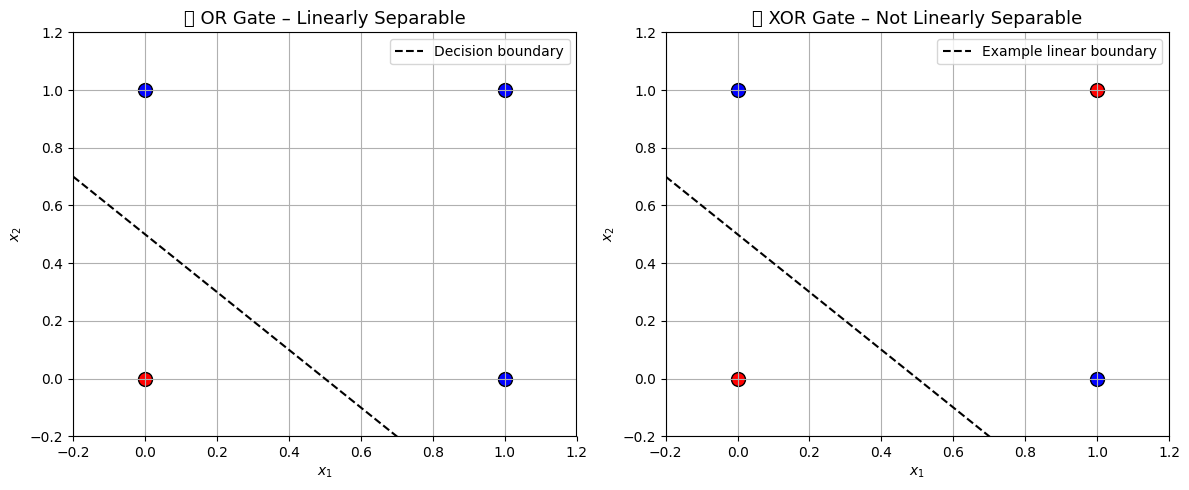

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# Define data for OR and XOR
# -----------------------------
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# OR gate outputs
y_or = np.array([0, 1, 1, 1])

# XOR gate outputs
y_xor = np.array([0, 1, 1, 0])

# -----------------------------
# Create subplots
# -----------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# -----------------------------
# Plot OR Gate (Linearly Separable)
# -----------------------------
ax = axes[0]
ax.set_title("✅ OR Gate – Linearly Separable", fontsize=13)

for i in range(len(X)):
    color = 'blue' if y_or[i] == 1 else 'red'
    ax.scatter(X[i, 0], X[i, 1], color=color, s=100, edgecolors='black')

# Example linear boundary for OR: x1 + x2 = 0.5
x_line = np.linspace(-0.2, 1.2, 100)
ax.plot(x_line, -x_line + 0.5, 'k--', label='Decision boundary')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend(loc='upper right')
ax.grid(True)

# -----------------------------
# Plot XOR Gate (Not Linearly Separable)
# -----------------------------
ax = axes[1]
ax.set_title("❌ XOR Gate – Not Linearly Separable", fontsize=13)

for i in range(len(X)):
    color = 'blue' if y_xor[i] == 1 else 'red'
    ax.scatter(X[i, 0], X[i, 1], color=color, s=100, edgecolors='black')

# Example linear boundary (any line will fail)
ax.plot(x_line, -x_line + 0.5, 'k--', label='Example linear boundary')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.2)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.legend(loc='upper right')
ax.grid(True)

# -----------------------------
# Final touches
# -----------------------------
plt.tight_layout()
plt.show()



👉 The classes are **interleaved** — to separate them, we need **two lines** or a **curved boundary**.  
A single perceptron can’t do that because it can only form one linear region.

---

## 🧱 The Solution: Multi-Layer Perceptron (MLP)

To handle XOR and other complex problems, we use **multiple layers of neurons**.  
Each layer learns a new *representation* of the data — combining several simple linear transformations to form a **nonlinear** function overall.

### Example Structure:

Input Layer (x₁, x₂)->
Hidden Layer (2 neurons)
->
Output Neuron 

Each hidden neuron defines a *line*, and combining them with nonlinear activation functions allows the model to form **curved** or **piecewise-linear** boundaries.

---

## 🌊 Nonlinearity and Activation Functions

The key to breaking the perceptron’s limitation is the use of **nonlinear activation functions**.  
Without them, even a multi-layer network would still behave like a single linear model.

### 🔹 Why Nonlinearity Matters

If every neuron used only linear transformations, say:

$$
z = w_1x_1 + w_2x_2 + b
$$

and each layer’s output was just another linear combination,  
then stacking layers would still result in a **linear function** overall.

Mathematically:
$$
W_2(W_1x + b_1) + b_2 = (W_2W_1)x + (W_2b_1 + b_2)
$$

→ still linear!  
That means even deep networks without nonlinearity are just *big perceptrons*.

---

## ⚡ Common Nonlinear Activation Functions

| Activation | Formula | Shape | Notes |
|:--|:--|:--:|:--|
| **Sigmoid** | $\displaystyle \sigma(x) = \frac{1}{1 + e^{-x}}$ | S-shaped | Squashes values between 0 and 1; used for probabilities |
| **Tanh** | $\displaystyle \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ | S-shaped | Range (-1, 1); zero-centered |
| **ReLU** | $\displaystyle f(x) = \max(0, x)$ | ⊔-shaped | Simple and efficient; most common today |
| **Leaky ReLU** | $\displaystyle f(x) = \max(0.01x, x)$ | ⊔-shaped with small slope | Solves “dead ReLU” problem |

These nonlinearities **bend** the decision boundary, allowing networks to represent complex patterns like XOR.

---

## 🧠 Example: XOR Solved by an MLP

Below is an example of a minimal neural network structure that can solve XOR:

$$
\text{Input } (x_1, x_2)
\quad \Rightarrow \quad
\text{Hidden layer (2 neurons with ReLU or tanh)}
\quad \Rightarrow \quad
\text{Output neuron (sigmoid)}
$$

Each hidden neuron defines a part of the space, and together they form the nonlinear boundary required to separate XOR.

---

## 🧭 Summary

| Concept | Description |
|:--|:--|
| **Perceptron** | Learns linear decision boundaries |
| **XOR problem** | Not linearly separable → cannot be solved by one perceptron |
| **MLP** | Multiple layers combine linear regions → nonlinear mapping |
| **Activation functions** | Introduce nonlinearity so models can learn complex patterns |
| **Result** | With nonlinear activations, MLP can learn XOR and any continuous function (Universal Approximation Theorem) |

> 💡 **In short:**  
> The perceptron fails on XOR because it’s *linear*.  
> Multi-layer networks succeed because **nonlinear activation functions** let them *bend* the decision boundary.


In [5]:
import numpy as np

# ---- Data: XOR ----
X = np.array([
    [0., 0.],
    [0., 1.],
    [1., 0.],
    [1., 1.]
])                            # shape (4, 2)
y = np.array([[0.], [1.], [1.], [0.]])  # shape (4, 1)

# ---- Helpers ----
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def dsigmoid(a):
    # derivative w.r.t. z when a = sigmoid(z)
    return a * (1 - a)

def tanh(z):
    return np.tanh(z)

def dtanh(a):
    # derivative w.r.t. z when a = tanh(z)
    return 1 - a**2

# ---- Initialize parameters ----
rng = np.random.default_rng(42)
n_in, n_hidden, n_out = 2, 2, 1

W1 = rng.normal(0, 1.0, size=(n_in, n_hidden)) * 0.5
b1 = np.zeros((1, n_hidden))
W2 = rng.normal(0, 1.0, size=(n_hidden, n_out)) * 0.5
b2 = np.zeros((1, n_out))

# ---- Training hyperparameters ----
lr = 0.1
epochs = 10000
m = X.shape[0]

for epoch in range(epochs):
    # ----- Forward pass -----
    z1 = X @ W1 + b1              # (4, 2)
    a1 = tanh(z1)                 # (4, 2)
    z2 = a1 @ W2 + b2             # (4, 1)
    a2 = sigmoid(z2)              # (4, 1)  predicted probs

    # ----- Loss (binary cross entropy) -----
    eps = 1e-8
    loss = -np.mean(y * np.log(a2 + eps) + (1 - y) * np.log(1 - a2 + eps))

    # ----- Backprop -----
    # With sigmoid + BCE, dL/dz2 simplifies to (a2 - y) / m
    dz2 = (a2 - y) / m                   # (4, 1)
    dW2 = a1.T @ dz2                     # (2, 1)
    db2 = np.sum(dz2, axis=0, keepdims=True)  # (1, 1)

    da1 = dz2 @ W2.T                     # (4, 2)
    dz1 = da1 * dtanh(a1)                # (4, 2)
    dW1 = X.T @ dz1                      # (2, 2)
    db1 = np.sum(dz1, axis=0, keepdims=True)  # (1, 2)

    # ----- Gradient step -----
    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch {epoch+1:5d} | Loss: {loss:.6f}")

# ---- Evaluate ----
def predict(Xnew):
    a1 = tanh(Xnew @ W1 + b1)
    a2 = sigmoid(a1 @ W2 + b2)
    return (a2 >= 0.5).astype(int), a2

y_hat, probs = predict(X)
print("\nPredicted probabilities:\n", np.round(probs, 4))
print("Predicted labels:       \n", y_hat.ravel())
print("True labels:            \n", y.ravel())


Epoch  1000 | Loss: 0.089759
Epoch  2000 | Loss: 0.024523
Epoch  3000 | Loss: 0.013869
Epoch  4000 | Loss: 0.009620
Epoch  5000 | Loss: 0.007350
Epoch  6000 | Loss: 0.005941
Epoch  7000 | Loss: 0.004982
Epoch  8000 | Loss: 0.004289
Epoch  9000 | Loss: 0.003764
Epoch 10000 | Loss: 0.003352

Predicted probabilities:
 [[0.0025]
 [0.9956]
 [0.9956]
 [0.0021]]
Predicted labels:       
 [0 1 1 0]
True labels:            
 [0. 1. 1. 0.]


# 🔁 Backpropagation and Gradient Descent

## ⚙️ What is Gradient Descent?

**Gradient Descent** is an optimization algorithm used to minimize the **loss function** of a neural network.  
It adjusts the model’s weights step-by-step in the direction that *reduces the error* between predictions and true labels.

### 🧮 Core Idea

At each step, we update the parameters (weights and biases) using:

$$
\theta := \theta - \eta \, \frac{\partial L}{\partial \theta}
$$

where:

- $\theta$: a parameter (e.g., weight or bias)  
- $\eta$: learning rate (controls step size)  
- $\frac{\partial L}{\partial \theta}$: gradient of the loss function with respect to that parameter  

> 💡 The gradient tells us the *direction of steepest ascent* in loss.  
> We move in the **opposite** direction to minimize the loss.

---

## 🧠 What is Backpropagation?

**Backpropagation** (short for *backward propagation of errors*) is the algorithm used to **compute gradients** efficiently for all weights in a neural network.

It’s how deep networks "learn" — by calculating how much each neuron contributed to the total error, and then adjusting its weights accordingly.


### Step 1: Forward Pass
We compute the activations step by step.

$$
z^{(1)} = W^{(1)}x + b^{(1)} \quad \Rightarrow \quad a^{(1)} = \tanh(z^{(1)})
$$

$$
z^{(2)} = W^{(2)}a^{(1)} + b^{(2)} \quad \Rightarrow \quad a^{(2)} = \sigma(z^{(2)})
$$

where:
- $x$ = input vector (e.g., $(x_1, x_2)$)
- $\tanh$ = activation function in hidden layer  
- $\sigma$ = sigmoid activation in output layer  
- $a^{(2)}$ = final output (predicted probability)

---

### Step 2: Compute Loss

For binary classification (like XOR), we use **Binary Cross-Entropy** loss:

$$
L = -[\,y\log(a^{(2)}) + (1 - y)\log(1 - a^{(2)})\,]
$$

This measures how far the model’s prediction $a^{(2)}$ is from the true label $y$.

---

### Step 3: Backward Pass (Backpropagation)

We now compute how the error flows *backwards* through the network.

#### 🔹 1. Output Layer Gradients
Compute the derivative of the loss with respect to the output layer pre-activation $z^{(2)}$:

$$
\frac{\partial L}{\partial z^{(2)}} = a^{(2)} - y
$$

This term tells how much the output neuron’s activation contributed to the error.

#### 🔹 2. Hidden Layer Gradients
To update $W^{(1)}$, we need to know how the hidden neurons affected the loss.

Using the chain rule:

$$
\frac{\partial L}{\partial z^{(1)}} = (W^{(2)})^T \frac{\partial L}{\partial z^{(2)}} \odot (1 - (a^{(1)})^2)
$$

where:
- $(W^{(2)})^T$ passes the error back from the output layer  
- $\odot$ denotes element-wise multiplication  
- $(1 - (a^{(1)})^2)$ is the derivative of $\tanh(z^{(1)})$

---

### Step 4: Compute Gradients for Weights and Biases

#### For the output layer:
$$
\frac{\partial L}{\partial W^{(2)}} = (a^{(1)})^T \frac{\partial L}{\partial z^{(2)}}
$$
$$
\frac{\partial L}{\partial b^{(2)}} = \frac{\partial L}{\partial z^{(2)}}
$$

#### For the hidden layer:
$$
\frac{\partial L}{\partial W^{(1)}} = x^T \frac{\partial L}{\partial z^{(1)}}
$$
$$
\frac{\partial L}{\partial b^{(1)}} = \frac{\partial L}{\partial z^{(1)}}
$$

---

### Step 5: Gradient Descent Updates

Finally, we update all parameters using gradient descent:

$$
W^{(l)} := W^{(l)} - \eta \, \frac{\partial L}{\partial W^{(l)}}
$$
$$
b^{(l)} := b^{(l)} - \eta \, \frac{\partial L}{\partial b^{(l)}}
$$

This process repeats for many epochs until the network converges (i.e., the loss stops decreasing).

---

## 🧩 Backpropagation on XOR

Let’s recall the XOR logic:

| x₁ | x₂ | y |
|:--:|:--:|:--:|
| 0 | 0 | 0 |
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 0 |

- During training, the **forward pass** produces predictions close to `[0.0, 0.5, 0.5, 1.0]` initially.  
- The **loss** is large because outputs differ from targets.  
- Backpropagation computes gradients showing which weights caused the high error.  
- **Gradient Descent** then adjusts those weights so the decision boundary becomes *nonlinear* — bending to correctly classify the diagonal pattern of XOR.  

After enough iterations, the network’s predictions converge to `[0.0, 1.0, 1.0, 0.0]`.

---

## ⚡ Key Intuitions

| Concept | Explanation |
|:--|:--|
| **Forward Pass** | The network makes a prediction using current weights. |
| **Loss Function** | Measures how wrong the prediction is. |
| **Backward Pass (Backprop)** | Propagates the error backward, computing each weight’s contribution. |
| **Gradients** | Show the direction and magnitude of change needed. |
| **Gradient Descent** | Updates weights slightly in the opposite direction of the gradient to reduce loss. |
| **Result** | The network gradually learns to represent nonlinear boundaries (like XOR). |

---

## 🧭 Summary

- **Gradient Descent** → How we *update* weights to minimize error  
- **Backpropagation** → How we *calculate* the gradients for all weights  
- Combined, they allow neural networks to **learn from data**

> 💡 In short:  
> Backpropagation tells us *which direction to move*,  
> Gradient Descent actually *moves* us there.



# 🔗 Simple Chain Rule Example for Backpropagation

## 🧠 What is the Chain Rule?

The **chain rule** from calculus tells us how to find the derivative of a *composition of functions*.

If we have:

$$
y = f(g(x))
$$

then by the chain rule:

$$
\frac{dy}{dx} = \frac{dy}{dg} \cdot \frac{dg}{dx}
$$

This means:  
> To know how $x$ affects $y$, multiply how $x$ affects $g$ by how $g$ affects $y$.

---

## ⚙️ Example: A Tiny Neural Network

Let’s say we have a *single neuron*:

$$
x \rightarrow z = wx + b \rightarrow y = \sigma(z)
$$

where $\sigma(z)$ is the **sigmoid activation**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Suppose our **loss function** is:

$$
L = (y - t)^2
$$

where $t$ is the target (true label).

We want $\frac{\partial L}{\partial w}$ — how much should we change the weight $w$?

---

## 🪄 Apply the Chain Rule Step by Step

We can think of the dependency chain as:

$$
w \rightarrow z \rightarrow y \rightarrow L
$$

By the chain rule:

$$
\frac{\partial L}{\partial w}
= \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial z} \cdot \frac{\partial z}{\partial w}
$$

---

### Step 1: Derivative of Loss w.r.t. Output

$$
\frac{\partial L}{\partial y} = 2(y - t)
$$

---

### Step 2: Derivative of Output w.r.t. Pre-Activation

Since $y = \sigma(z)$,

$$
\frac{\partial y}{\partial z} = \sigma(z)(1 - \sigma(z)) = y(1 - y)
$$

---

### Step 3: Derivative of Pre-Activation w.r.t. Weight

Since $z = wx + b$,

$$
\frac{\partial z}{\partial w} = x
$$

---

### Step 4: Combine Everything

$$
\frac{\partial L}{\partial w} = 2(y - t) \cdot y(1 - y) \cdot x
$$

---

## 🧩 Example with Numbers

Let:

- $x = 2$  
- $w = 0.5$  
- $b = 0$  
- $t = 1$

Then:

$$
z = wx + b = 0.5(2) + 0 = 1
$$

$$
y = \sigma(1) = 0.731
$$

Now compute:

$$
\frac{\partial L}{\partial w}
= 2(0.731 - 1) \cdot 0.731(1 - 0.731) \cdot 2
$$

$$
\frac{\partial L}{\partial w}
= 2(-0.269) \cdot 0.197 \cdot 2
\approx -0.212
$$

✅ So the gradient is **negative**, meaning we should *increase* $w$ slightly to reduce the loss.

---

## 🧭 Summary

| Step | Meaning | Formula |
|:--|:--|:--|
| 1 | Loss sensitivity to output | $\frac{\partial L}{\partial y} = 2(y - t)$ |
| 2 | Output sensitivity to neuron input | $\frac{\partial y}{\partial z} = y(1 - y)$ |
| 3 | Input sensitivity to weight | $\frac{\partial z}{\partial w} = x$ |
| 💡 Combined | Weight gradient | $\frac{\partial L}{\partial w} = 2(y - t) \cdot y(1 - y) \cdot x$ |

> The **chain rule** lets us “chain together” all partial derivatives so the loss can tell every parameter in the network how to adjust itself.


# 🧱 Multi-Layer Perceptron (MLP)

## 🧠 What is a Multi-Layer Perceptron?

A **Multi-Layer Perceptron (MLP)** is a type of **feedforward artificial neural network** that consists of **multiple layers of neurons**, allowing it to learn **nonlinear relationships** between inputs and outputs.

Unlike a single-layer perceptron, which can only separate **linearly separable** data (like OR or AND), an MLP can model **nonlinear decision boundaries**, enabling it to solve problems such as **XOR**, image recognition, or speech classification.

---

## 🧩 Structure of an MLP

An MLP is made up of:

1. **Input Layer:**  
   Receives the input features (e.g., pixel values, sensor data, etc.).

2. **Hidden Layer(s):**  
   One or more layers that perform nonlinear transformations through **activation functions**.

3. **Output Layer:**  
   Produces the final predictions (e.g., probabilities, class labels, or numeric values).

### Example:

Input → Hidden Layer → Hidden Layer → Output

Each neuron in a layer is connected to **every neuron** in the next layer — this is called a **fully connected (dense) network**.

---

## ⚙️ Mathematical Representation

For one hidden layer MLP:

- Input vector: $x \in \mathbb{R}^{n}$
- Hidden layer (with $m$ neurons):  
  $$ z^{(1)} = W^{(1)}x + b^{(1)} $$
  $$ a^{(1)} = f(z^{(1)}) $$
- Output layer (with $k$ neurons):  
  $$ z^{(2)} = W^{(2)}a^{(1)} + b^{(2)} $$
  $$ a^{(2)} = g(z^{(2)}) $$

where:
- $W^{(1)}, W^{(2)}$ are weight matrices,
- $b^{(1)}, b^{(2)}$ are bias vectors,
- $f(\cdot)$ and $g(\cdot)$ are **activation functions**.

---

## 🌊 Activation Functions

Activation functions introduce **nonlinearity**, allowing the MLP to model complex relationships.

| Function | Formula | Range | Notes |
|:--|:--|:--|:--|
| **Sigmoid** | $\displaystyle \sigma(x) = \frac{1}{1 + e^{-x}}$ | (0, 1) | Used for probabilities |
| **Tanh** | $\displaystyle \tanh(x) = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ | (-1, 1) | Zero-centered, smooth |
| **ReLU** | $\displaystyle f(x) = \max(0, x)$ | [0, ∞) | Simple and fast; avoids vanishing gradients |
| **Leaky ReLU** | $\displaystyle f(x) = \max(0.01x, x)$ | (-∞, ∞) | Prevents dead neurons |

Without nonlinear activations, multiple linear layers would still behave like **a single linear transformation**.

---

## 🔁 Learning Process (Training)

The MLP learns by **adjusting its weights and biases** to minimize a loss function using **gradient descent** and **backpropagation**.

1. **Forward Pass:**  
   Compute predictions by passing inputs through the network.
   $$ x \rightarrow z^{(1)} \rightarrow a^{(1)} \rightarrow z^{(2)} \rightarrow a^{(2)} $$

2. **Compute Loss:**  
   Measure error between predictions and true labels.  
   Example: Binary Cross-Entropy or Mean Squared Error.

3. **Backward Pass (Backpropagation):**  
   Use the **chain rule** to compute the gradients of the loss with respect to each weight.

4. **Weight Update (Gradient Descent):**  
   $$ W := W - \eta \frac{\partial L}{\partial W} $$
   where $\eta$ is the **learning rate**.

This process repeats for many **epochs** until the network’s predictions become accurate.

---

## 🎯 Why MLPs Are Powerful

- They can learn **nonlinear mappings**.  
- They are **universal function approximators** — with enough neurons and layers, they can approximate any continuous function.  
- They form the foundation of **Deep Learning**, where “deep” means having many hidden layers.

---

## 🧭 Summary

| Concept | Description |
|:--|:--|
| **Architecture** | Input → Hidden layer(s) → Output |
| **Core Idea** | Multiple linear transformations + nonlinear activations |
| **Learning Algorithm** | Backpropagation + Gradient Descent |
| **Capability** | Models complex nonlinear patterns |
| **Limitation** | Computationally expensive, needs careful tuning |

> 💡 **In short:**  
> A Multi-Layer Perceptron combines layers of simple perceptrons with nonlinear activations,  
> enabling the network to learn complex patterns that single-layer models cannot.

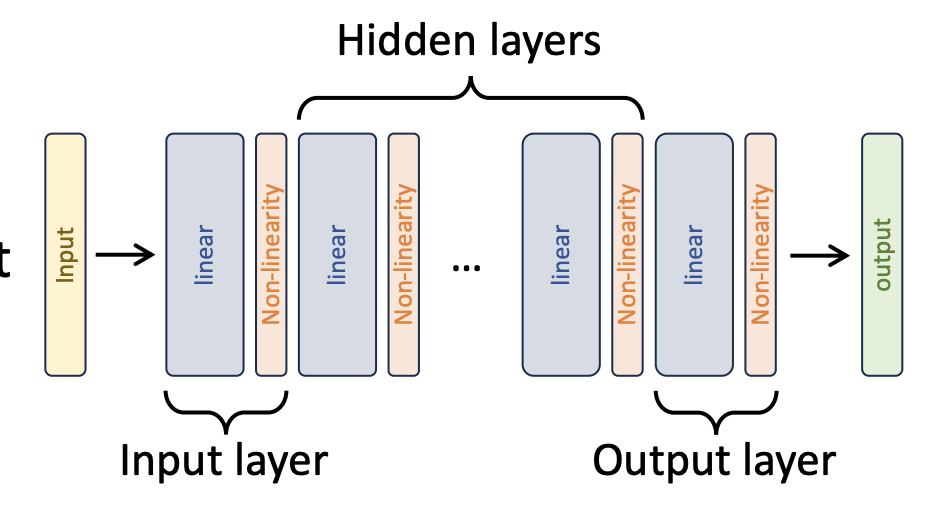
![img.png](img/1_-IPQlOd46dlsutIbUq1Zcw.png)

In [6]:
import numpy as np

# ----- Data: XOR -----
X = np.array([[0.,0.],
              [0.,1.],
              [1.,0.],
              [1.,1.]])             # (4, 2)
y = np.array([[0.],
              [1.],
              [1.],
              [0.]])                 # (4, 1)

# ----- Activations -----
def sigmoid(z): return 1/(1+np.exp(-z))
def dsigmoid(a): return a*(1-a)          # when a = sigmoid(z)
def tanh(z): return np.tanh(z)
def dtanh(a): return 1 - a**2             # when a = tanh(z)

# ----- Init params -----
rng = np.random.default_rng(0)
n_in, n_hidden, n_out = 2, 2, 1
W1 = rng.normal(0, 0.5, size=(n_in, n_hidden))
b1 = np.zeros((1, n_hidden))
W2 = rng.normal(0, 0.5, size=(n_hidden, n_out))
b2 = np.zeros((1, n_out))

# ----- Hyperparams -----
lr = 0.1
epochs = 5000
m = X.shape[0]

for e in range(epochs):
    # ---- forward ----
    z1 = X @ W1 + b1          # (4,2)
    a1 = tanh(z1)             # (4,2)
    z2 = a1 @ W2 + b2         # (4,1)
    yhat = sigmoid(z2)        # (4,1)

    # binary cross-entropy (mean)
    eps = 1e-8
    loss = -np.mean(y*np.log(yhat+eps) + (1-y)*np.log(1-yhat+eps))

    # ---- backward ----
    dz2 = (yhat - y) / m              # (4,1) BCE+sigmoid simplification
    dW2 = a1.T @ dz2                  # (2,1)
    db2 = np.sum(dz2, axis=0, keepdims=True)

    da1 = dz2 @ W2.T                  # (4,2)
    dz1 = da1 * dtanh(a1)             # (4,2)
    dW1 = X.T @ dz1                   # (2,2)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # ---- update ----
    W2 -= lr * dW2;  b2 -= lr * db2
    W1 -= lr * dW1;  b1 -= lr * db1

    if (e+1) % 1000 == 0:
        print(f"Epoch {e+1:4d} | loss = {loss:.4f}")

# ----- Test -----
probs = yhat
preds = (probs >= 0.5).astype(int)
print("\nPredicted probabilities:\n", np.round(probs, 3))
print("Predicted labels:\n", preds.ravel())
print("True labels:\n", y.ravel())


Epoch 1000 | loss = 0.6929
Epoch 2000 | loss = 0.6175
Epoch 3000 | loss = 0.0467
Epoch 4000 | loss = 0.0193
Epoch 5000 | loss = 0.0120

Predicted probabilities:
 [[0.009]
 [0.984]
 [0.985]
 [0.008]]
Predicted labels:
 [0 1 1 0]
True labels:
 [0. 1. 1. 0.]


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim

torch.manual_seed(0)

# XOR data (make sure targets are float 0/1)
X = torch.tensor([[0.,0.],
                  [0.,1.],
                  [1.,0.],
                  [1.,1.]], dtype=torch.float32)
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]], dtype=torch.float32)

class XORNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 8),
            nn.Tanh(),
            nn.Linear(8, 4),
            nn.Tanh(),
            nn.Linear(4, 1)  # raw logits
        )
    def forward(self, x):
        return self.net(x)  # DO NOT apply sigmoid here

model = XORNet()
criterion = nn.BCEWithLogitsLoss()       # expects raw logits
optimizer = optim.Adam(model.parameters(), lr=0.02)

for epoch in range(5000):
    optimizer.zero_grad()
    logits = model(X)                    # raw logits
    loss = criterion(logits, y)          # OK: logits + BCEWithLogitsLoss
    loss.backward()
    optimizer.step()
    if (epoch+1) % 500 == 0:
        print(f"Epoch {epoch+1:4d} | Loss: {loss.item():.6f}")

with torch.no_grad():
    logits = model(X)
    probs = torch.sigmoid(logits)        # convert to probabilities for viewing
    preds = (probs >= 0.5).float()

print("Preds:", preds.squeeze().int().tolist())
print("True :", y.squeeze().int().tolist())


Epoch  500 | Loss: 0.000871
Epoch 1000 | Loss: 0.000298
Epoch 1500 | Loss: 0.000151
Epoch 2000 | Loss: 0.000090
Epoch 2500 | Loss: 0.000059
Epoch 3000 | Loss: 0.000040
Epoch 3500 | Loss: 0.000028
Epoch 4000 | Loss: 0.000021
Epoch 4500 | Loss: 0.000015
Epoch 5000 | Loss: 0.000011
Preds: [0, 1, 1, 0]
True : [0, 1, 1, 0]


# 📊 Interpreting Logits in Neural Networks

## 🧠 What Are Logits?

In machine learning, a **logit** is the **raw output** of a neural network **before** applying an activation function (like sigmoid or softmax).

- It represents **unbounded real numbers** (can be negative or positive).
- The model’s *confidence* or *probability* is obtained by applying a suitable activation.

> 💡 In short:  
> Logits are the model’s internal “scores.”  
> Activations (like sigmoid or softmax) turn those scores into probabilities.

---

## ⚙️ 1. Binary Classification (2 classes)

### 🔹 Example Task
Predict whether an email is spam (`1`) or not spam (`0`).

### 🔹 Output Layer
- The model has **1 output neuron** producing a single logit $z$.
- This value is transformed using the **sigmoid** activation:

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

### 🔹 Interpretation
- $z = 0$ → $\hat{y} = 0.5$ → the model is uncertain.  
- $z > 0$ → $\hat{y} > 0.5$ → predicts **Class 1** (positive).  
- $z < 0$ → $\hat{y} < 0.5$ → predicts **Class 0** (negative).

### 🔹 Example
| Logit $z$ | Sigmoid $\hat{y}$ | Prediction |
|:--:|:--:|:--:|
| -3.0 | 0.047 | Class 0 |
| 0.0 | 0.500 | Uncertain |
| +3.0 | 0.953 | Class 1 |

> The further $z$ is from 0, the more confident the model.

---

## ⚙️ 2. Multi-Class Classification (3+ classes)

### 🔹 Example Task
Predict whether an image is of a **cat**, **dog**, or **rabbit**.

### 🔹 Output Layer
- The model has **one logit per class**:  
  $$
  z = [z_{\text{cat}}, z_{\text{dog}}, z_{\text{rabbit}}]
  $$
- These logits are passed through a **softmax** activation to get class probabilities:

$$
p_i = \frac{e^{z_i}}{\sum_j e^{z_j}}
$$

where $p_i$ is the predicted probability for class $i$.

### 🔹 Interpretation
- The **largest logit** corresponds to the **predicted class**.
- The **differences between logits** determine *confidence* (not their absolute values).

### 🔹 Example
| Class | Logit $z_i$ | Softmax $p_i$ | Prediction |
|:--|:--:|:--:|:--:|
| Cat | 2.1 | 0.70 | ✅ |
| Dog | 0.9 | 0.20 | ❌ |
| Rabbit | -0.5 | 0.10 | ❌ |

> The softmax normalizes logits so all probabilities sum to 1.

---

## ⚙️ 3. Regression

### 🔹 Example Task
Predict a **house price** or **temperature** — continuous values.

### 🔹 Output Layer
- The model outputs a **single logit** $z$ without any activation:
  $$
  \hat{y} = z
  $$
- No sigmoid or softmax is applied.

### 🔹 Interpretation
- The logit itself **is the prediction** (a real number).  
- The loss function is usually **Mean Squared Error (MSE)**:
  $$
  L = \frac{1}{N} \sum_i (\hat{y}_i - y_i)^2
  $$

| Input | Logit (Prediction) | True Value | Error |
|:--|:--:|:--:|:--:|
| [size=80m², rooms=3] | 320,000 | 310,000 | +10,000 |
| [size=100m², rooms=4] | 420,000 | 400,000 | +20,000 |

> In regression, we don’t interpret logits as probabilities —  
> they directly represent continuous numeric outputs.

---

## 🧭 Summary

| Task | Output Type | Activation | Logit Meaning | Example Loss |
|:--|:--|:--|:--|:--|
| **Binary Classification** | 1 neuron | Sigmoid | Confidence score for Class 1 | Binary Cross-Entropy |
| **Multi-Class Classification** | $K$ neurons | Softmax | Score for each class | Categorical Cross-Entropy |
| **Regression** | 1 neuron | None (Linear) | Continuous numeric prediction | Mean Squared Error |

---

> 💡 **In short:**  
> - **Logits** are the *raw model outputs*.  
> - We apply **activations** (sigmoid, softmax, or none) depending on the task.  
> - These convert logits into meaningful predictions — probabilities or continuous values.


In [7]:
import numpy as np

# ============================================================
# 🧩 1. Binary Classification (Sigmoid)
# ============================================================
print("=== 1️⃣ Binary Classification (Sigmoid) ===")

# Raw logit output (before activation)
logits_binary = np.array([-3.0, 0.0, 3.0])

# Sigmoid activation
sigmoid = 1 / (1 + np.exp(-logits_binary))

for z, s in zip(logits_binary, sigmoid):
    print(f"Logit: {z:>5.1f}  →  Sigmoid (prob of class 1): {s:.3f}")

# Interpretation
print("\nInterpretation:")
print("- Large negative logits → confident class 0 (prob≈0)")
print("- Logit ≈ 0 → uncertain (prob≈0.5)")
print("- Large positive logits → confident class 1 (prob≈1)")

# ============================================================
# 🧩 2. Multi-Class Classification (Softmax)
# ============================================================
print("\n\n=== 2️⃣ Multi-Class Classification (Softmax) ===")

# Logits for 3 classes: [cat, dog, rabbit]
logits_multi = np.array([2.1, 0.9, -0.5])

# Softmax activation
exp_z = np.exp(logits_multi - np.max(logits_multi))  # numerical stability
softmax = exp_z / np.sum(exp_z)

for label, z, p in zip(["Cat", "Dog", "Rabbit"], logits_multi, softmax):
    print(f"{label:<7} | Logit: {z:>5.2f} | Softmax prob: {p:.3f}")

print(f"\nPredicted class: {['Cat','Dog','Rabbit'][np.argmax(softmax)]}")

# Interpretation
print("\nInterpretation:")
print("- Highest logit → highest softmax probability")
print("- Probabilities sum to 1")

# ============================================================
# 🧩 3. Regression (No activation)
# ============================================================
print("\n\n=== 3️⃣ Regression (No activation) ===")

# Logit is the predicted continuous value
logits_reg = np.array([320000, 420000])  # predicted house prices
true_values = np.array([310000, 400000]) # ground truth

errors = logits_reg - true_values
mse = np.mean(errors**2)

for pred, true in zip(logits_reg, true_values):
    print(f"Predicted: {pred:>8.0f} | True: {true:>8.0f} | Error: {pred - true:>+8.0f}")

print(f"\nMean Squared Error (MSE): {mse:.2e}")

print("\nInterpretation:")
print("- In regression, logits are direct predictions (no sigmoid/softmax).")
print("- The model learns to minimize numeric error (e.g., MSE).")


=== 1️⃣ Binary Classification (Sigmoid) ===
Logit:  -3.0  →  Sigmoid (prob of class 1): 0.047
Logit:   0.0  →  Sigmoid (prob of class 1): 0.500
Logit:   3.0  →  Sigmoid (prob of class 1): 0.953

Interpretation:
- Large negative logits → confident class 0 (prob≈0)
- Logit ≈ 0 → uncertain (prob≈0.5)
- Large positive logits → confident class 1 (prob≈1)


=== 2️⃣ Multi-Class Classification (Softmax) ===
Cat     | Logit:  2.10 | Softmax prob: 0.727
Dog     | Logit:  0.90 | Softmax prob: 0.219
Rabbit  | Logit: -0.50 | Softmax prob: 0.054

Predicted class: Cat

Interpretation:
- Highest logit → highest softmax probability
- Probabilities sum to 1


=== 3️⃣ Regression (No activation) ===
Predicted:   320000 | True:   310000 | Error:   +10000
Predicted:   420000 | True:   400000 | Error:   +20000

Mean Squared Error (MSE): 2.50e+08

Interpretation:
- In regression, logits are direct predictions (no sigmoid/softmax).
- The model learns to minimize numeric error (e.g., MSE).


# ⚖️ Understanding Loss Functions in Machine Learning

## 🧠 What Is a Loss Function?

A **loss function** (or **cost function**) measures **how far the model’s predictions are from the true values**.  
It quantifies the “error” — the smaller the loss, the better the model’s performance.

In training, the goal of the model is to **minimize this loss** using optimization algorithms such as **Gradient Descent**.

> 💡 In simple terms:  
> A loss function tells us *how wrong the model is*.

---

## ⚙️ How It Works

1. **Model makes a prediction:** $\hat{y} = f(x; W, b)$  
2. **Compare with true label:** $y$
3. **Compute loss:** $L(y, \hat{y})$
4. **Update weights:** by minimizing $L$ using backpropagation and gradient descent.

---

## 🔢 1. Loss Functions for Regression

Regression problems predict **continuous numeric values** (like price, temperature, etc.).

### 🔹 Mean Squared Error (MSE)

$$
L_{MSE} = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2
$$

- Penalizes large errors more (because of squaring).  
- Smooth and differentiable → ideal for gradient descent.  
- Works best when errors follow a normal (Gaussian) distribution.

**Example:**  
If the true house price is \$300,000 and prediction is \$320,000 → error = 20,000 → loss = (20,000)² = 400,000,000.

---

### 🔹 Mean Absolute Error (MAE)

$$
L_{MAE} = \frac{1}{N} \sum_{i=1}^N |y_i - \hat{y}_i|
$$

- Measures the average *absolute difference*.  
- More robust to outliers (no squaring).  
- However, less smooth → gradients can be less stable.

---

### 🔹 Huber Loss

$$
L_{\delta}(y, \hat{y}) =
\begin{cases}
\frac{1}{2}(y - \hat{y})^2, & \text{if } |y - \hat{y}| \le \delta \\
\delta(|y - \hat{y}| - \frac{1}{2}\delta), & \text{otherwise}
\end{cases}
$$

- Combines MSE (for small errors) and MAE (for large errors).  
- Used when you want both stability and robustness.

---

## 🧩 2. Loss Functions for Binary Classification

Binary classification predicts **two classes** (0 or 1).  
The model outputs a **probability** $\hat{y} \in [0,1]$, typically via a **sigmoid** activation.

### 🔹 Binary Cross-Entropy (Log Loss)

$$
L_{BCE} = -\frac{1}{N} \sum_{i=1}^N [y_i \log(\hat{y}_i) + (1 - y_i)\log(1 - \hat{y}_i)]
$$

- Strongly penalizes confident wrong predictions.  
- Perfectly fits probabilistic outputs.

**Example:**
| True Label ($y$) | Predicted ($\hat{y}$) | Loss |
|:--:|:--:|:--:|
| 1 | 0.9 | 0.10 |
| 1 | 0.1 | 2.30 |
| 0 | 0.1 | 0.10 |
| 0 | 0.9 | 2.30 |

> If the model predicts 0.9 for class 1 → good (low loss).  
> If it predicts 0.9 for class 0 → bad (high loss).

---

## 🧭 3. Loss Functions for Multi-Class Classification

When predicting **K classes**, the network outputs **K logits**, one for each class.  
They’re turned into probabilities using **softmax**, then compared using **Categorical Cross-Entropy**.

### 🔹 Categorical Cross-Entropy (CCE)

$$
L_{CCE} = -\frac{1}{N} \sum_{i=1}^N \sum_{k=1}^K y_{i,k} \log(\hat{y}_{i,k})
$$

where:
- $y_{i,k}$ = 1 if sample $i$ belongs to class $k$, else 0.  
- $\hat{y}_{i,k}$ = predicted probability for class $k$ (after softmax).

**Example:**

| Class | True $y_k$ | Predicted $\hat{y}_k$ | Contribution to Loss |
|:--|:--:|:--:|:--:|
| Cat | 1 | 0.7 | $-\log(0.7)=0.357$ |
| Dog | 0 | 0.2 | 0 |
| Rabbit | 0 | 0.1 | 0 |

Total loss = 0.357 → low (good prediction).

---

## 🎯 4. When to Use Which Loss Function

| Task | Common Loss Function | Output Activation | Notes |
|:--|:--|:--|:--|
| **Regression** | MSE, MAE, Huber | None (Linear) | Predicts real numbers |
| **Binary Classification** | Binary Cross-Entropy | Sigmoid | Predicts probability of Class 1 |
| **Multi-Class Classification** | Categorical Cross-Entropy | Softmax | Predicts probability over multiple classes |

---

## 💡 Intuition Summary

| Concept | Intuition |
|:--|:--|
| **MSE** | "How far off are my predictions?" (squared distance) |
| **MAE** | "On average, how much am I wrong?" (absolute distance) |
| **Cross-Entropy** | "How surprised am I by the true label?" (penalizes wrong confidence) |
| **Huber** | "Blend of MSE & MAE — robust but smooth" |

---

> ⚡ **In short:**  
> Loss functions are the **compass** guiding learning.  
> They measure the gap between what the model predicts and what’s true,  
> and backpropagation uses this signal to **adjust weights and reduce that gap**.


# 🧩 Convolutional Neural Networks (CNNs)

**Convolutional Neural Networks (CNNs)** are a type of deep learning model designed to automatically extract and learn **spatial patterns** from data — especially images.

## 🎯 Purpose
CNNs are built to recognize **local features** such as edges, textures, or shapes, and combine them into higher-level representations (like objects or faces).

## ⚙️ How They Work
- **Convolution layers:** Apply filters (kernels) that slide over the input to detect features.  
- **Pooling layers:** Reduce dimensionality while keeping important information.  
- **Fully connected layers:** Combine extracted features to make final predictions (e.g., class scores).

## 🧠 Intuition
Instead of looking at an image pixel-by-pixel, CNNs learn **which patterns matter most** — from small edges in early layers to complex objects in deeper layers.

> 💡 **In short:**  
> CNNs automatically learn visual features and are mainly used for **image recognition**, **object detection**, and **computer vision** tasks.

![img.png](img/cnn.png)

In [9]:
pip install torch

     |████████████████████████████████| 73.6 MB 7.0 MB/s eta 0:00:01     |█████▊                          | 13.2 MB 2.8 MB/s eta 0:00:22
     |████████████████████████████████| 199 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 134 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.3 MB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 536 kB 5.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install torchvision

     |████████████████████████████████| 1.9 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [30]:
# 🧠 Simple CNN for CIFAR-10 Image Classification

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# ------------------------------------------------------------
# 1️⃣ Load CIFAR-10 dataset
# ------------------------------------------------------------
transform = transforms.Compose([
    transforms.ToTensor(),                        # Convert PIL images to tensors
    transforms.Normalize((0.5, 0.5, 0.5),         # Normalize each color channel
                         (0.5, 0.5, 0.5))
])

train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_data  = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_data, batch_size=64, shuffle=False)

# ------------------------------------------------------------
# 2️⃣ Define a simple CNN
# ------------------------------------------------------------
class SimpleCIFAR10CNN(nn.Module):
    def __init__(self):
        super(SimpleCIFAR10CNN, self).__init__()
        # Input: 3×32×32 (RGB image)
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)  # → 16×32×32
        self.pool  = nn.MaxPool2d(2, 2)                          # → 16×16×16
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1) # → 32×16×16 → pool → 32×8×8
        self.fc1   = nn.Linear(32 * 8 * 8, 128)
        self.fc2   = nn.Linear(128, 10)                          # 10 output classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)     # Flatten
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCIFAR10CNN()
print(model)

# ------------------------------------------------------------
# 3️⃣ Define loss and optimizer
# ------------------------------------------------------------
criterion = nn.CrossEntropyLoss()      # suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ------------------------------------------------------------
# 4️⃣ Train for a few epochs
# ------------------------------------------------------------
for epoch in range(3):  # (3 epochs for demo)
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1} | Loss: {running_loss/len(train_loader):.4f}")

# ------------------------------------------------------------
# 5️⃣ Evaluate on test set
# ------------------------------------------------------------
correct, total = 0, 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ Test Accuracy: {100 * correct / total:.2f}%")

# ------------------------------------------------------------
# 6️⃣ Show class names (optional)
# ------------------------------------------------------------
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')
print("Example classes:", classes)


SimpleCIFAR10CNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
Epoch 1 | Loss: 1.4370
Epoch 2 | Loss: 1.0903
Epoch 3 | Loss: 0.9480
✅ Test Accuracy: 63.86%
Example classes: ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


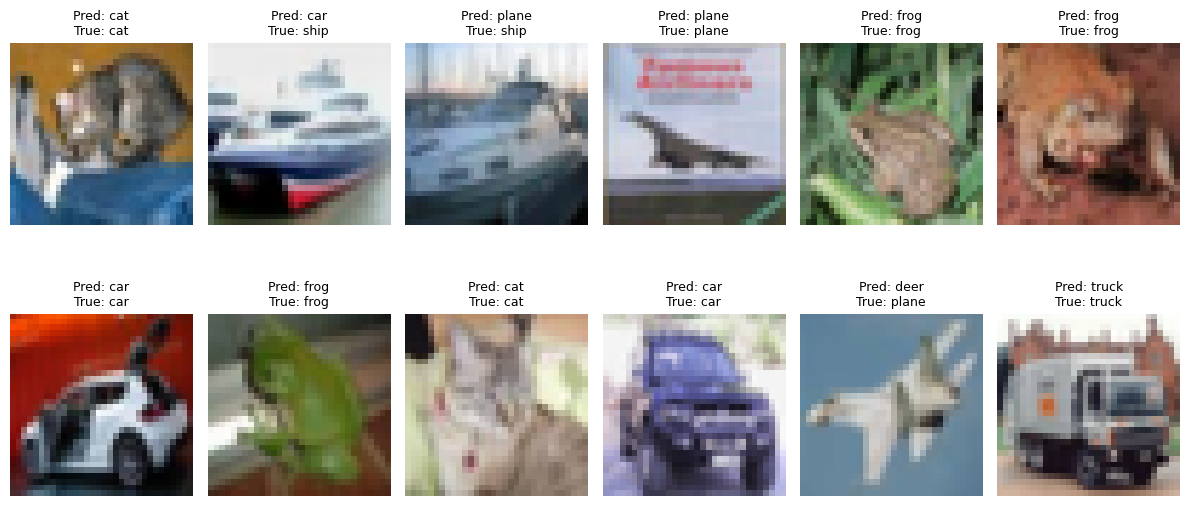

In [31]:
import matplotlib.pyplot as plt
import numpy as np
use_fake=False
def imshow_grid(images, titles, ncols=6, figsize=(12, 6)):
    n = len(images)
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=figsize)
    for i in range(n):
        ax = plt.subplot(nrows, ncols, i+1)
        img = images[i].transpose(1,2,0)  # C,H,W -> H,W,C
        plt.imshow(img)
        ax.set_title(titles[i], fontsize=9)
        ax.axis("off")
    plt.tight_layout()
    plt.show()

def denorm(img_batch):
    # inverse of Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)): x = (x - mean)/std -> x*std + mean
    mean = np.array([0.5,0.5,0.5])[:,None,None]
    std  = np.array([0.5,0.5,0.5])[:,None,None]
    imgs = img_batch.cpu().numpy()
    return np.clip((imgs * std + mean), 0, 1)

# ----------------------------
# 5) Predict on a test batch and visualize
# ----------------------------
model.eval()
with torch.no_grad():
    imgs, labels = next(iter(test_loader))
    logits = model(imgs)
    preds = torch.argmax(logits, dim=1)

# Build titles
labels_np = labels.numpy()
preds_np  = preds.cpu().numpy()
titles = []
for t, p in zip(labels_np, preds_np):
    t_name = classes[t] if not use_fake else f"class {t}"
    p_name = classes[p] if not use_fake else f"class {p}"
    titles.append(f"Pred: {p_name}\nTrue: {t_name}")

# Denormalize and plot first 12
imgs_vis = denorm(imgs[:12])
imshow_grid(imgs_vis, titles[:12], ncols=6, figsize=(12,6))

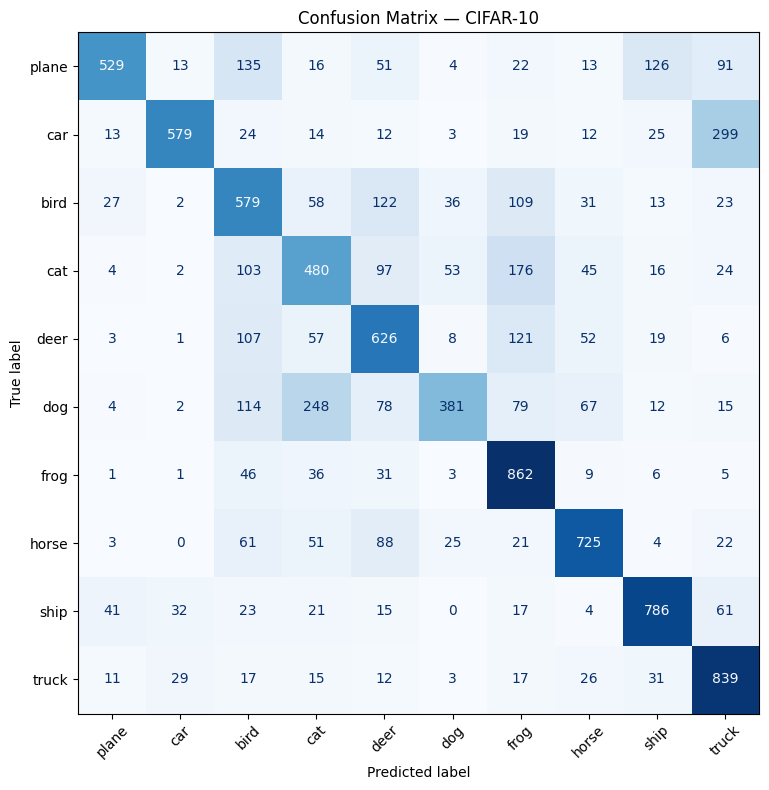

✅ Overall Accuracy: 63.86%


In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()

# ----------------------------
# 3️⃣ Collect predictions
# ----------------------------
y_true, y_pred = [], []
with torch.no_grad():
    for imgs, labels in test_loader:
        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)
        y_true.extend(labels.numpy())
        y_pred.extend(preds.numpy())

# ----------------------------
# 4️⃣ Confusion Matrix
# ----------------------------
cm = confusion_matrix(y_true, y_pred)
fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classes if not use_fake else [f"class {i}" for i in range(10)])
disp.plot(cmap="Blues", ax=ax, colorbar=False)
plt.title("Confusion Matrix — CIFAR-10")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------
# 5️⃣ Optional: Print accuracy
# ----------------------------
acc = np.trace(cm) / np.sum(cm)
print(f"✅ Overall Accuracy: {acc*100:.2f}%")